# Project Python Foundations: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd
#pd.set_option('display.float_format', lambda x: '%.2f' % x)
# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** Write the code to check the shape of the dataset and write your observations based on that. (0.5 mark)

In [3]:
# write your code here
df.shape

(1898, 9)

#### Observations:
    - There are 1898 rows and 9 columns

### Question 2: Write the observations based on the below output from the info() method. (0.5 mark)

In [4]:
# use info() to print a concise summary of the DataFrame
df1 = df.copy()
df2 = df1.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
-As expected, there are 1898 values for each column 

-None of the features are classified as catagorical

-the rating column is currently an object rather than a float indicating that there are some non-numeric values in the dataset

### Question 3: 'restaurant_name', 'cuisine_type', 'day_of_the_week' are object types. Write the code to convert the mentioned features to 'category' and write your observations on the same. (0.5 mark)

In [5]:
# coverting "objects" to "category" reduces the data space required to store the dataframe
# write the code to convert 'restaurant_name', 'cuisine_type', 'day_of_the_week' into categorical data
df['restaurant_name'] = df.restaurant_name.astype('category')
df['cuisine_type'] = df.cuisine_type.astype('category')
df['day_of_the_week'] = df.day_of_the_week.astype('category')
# use info() to print a concise summary of the DataFrame
#df.info()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 103.7+ KB


#### Observations:
Due to the new classification of the three categorical variables, the data types for the restaurant_name, cuisine_type, and day_of_the_week columns have updated to 'Category'.
This is useful since these are string fields and reclassifying them saves memory

### **Question 4:** Write the code to find the summary statistics and write your observations based on that. (1 mark)

In [7]:
# write your code here
df.describe().T.round(2)


,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.0,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
cost_of_the_order,1898.0,16.50,7.48,4.47,12.08,14.14,22.30,35.41
food_preparation_time,1898.0,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.0,24.16,4.97,15.00,20.00,25.00,28.00,33.00


#### Observations:
-the mean of the cost of the order is marginally larger than the 50% percentile median value indicating a somewhat normal distribution for that field and slight skew to the right.

-The same is also true for the food_preparation_time and the delivery time. In the case of the delivery time however, the skew is slightly to the left.

-There is a large range for the cost of the orders and it might be worth exploring how that impacts the number of orders placed (i.e. are more expensive restaurants more popular and worth the expense to the company or do people tend to prefer cheaper meals? If cheaper meals are preferable then resources could potentially be reallocated to appeal to less expensive restaurants participating in Food Hub).

-There is also a large range for the food preparation and delivery times. The max of each is over thirty minutes which could have a negative impact on a restaurant's rating and thus making it less profitable to invest in.


### **Question 5:** How many orders are not rated? (0.5 mark)

In [8]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
 736 orders have not been rated

##### Replacing "Not given" values with the average rating for each restaurant:

In [9]:
df3 = df.replace('Not given', np.nan)

In [10]:
df3['rating'] = df3['rating'].astype(float)

In [11]:
df3['rating'] = df3.groupby('restaurant_name')['rating'].transform(lambda grp: grp.fillna(np.mean(grp)))

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on the distributions of all the relevant variables in the dataset. (5 marks)

<AxesSubplot:xlabel='cuisine_cat', ylabel='count'>

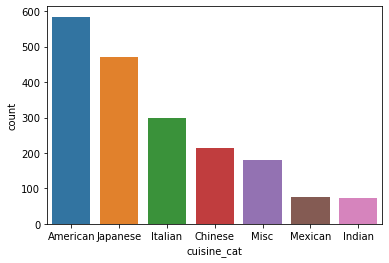

In [13]:
df['cuisine_cat'] = df['cuisine_type'].apply(lambda x : len(df[df['cuisine_type'] ==x]) >49 )
df['cuisine_cat'] =np.where(df['cuisine_cat'], df['cuisine_type'], 'Misc')
df3['cuisine_cat'] =df['cuisine_cat']
sns.countplot(x ='cuisine_cat', data =df, order = df['cuisine_cat'].value_counts().index)
#plt.savefig("cuisine.jpg", bbox_inches='tight')

In [14]:
df['cuisine_cat'].value_counts(normalize = True)*100

American    30.769231
Japanese    24.762908
Italian     15.700738
Chinese     11.327713
Misc         9.536354
Mexican      4.056902
Indian       3.846154
Name: cuisine_cat, dtype: float64

-American cuisine is the most popular cuisine in the dataset followed closely by Japanese cuisine.

-American, Japanese, Italian, Chinese, and to a lesser extent Mexican and Indian cuisine make up the vast majority of the dataset with other cuisines making up less that 10% of all orders placed

-This is useful to know so that Food Hub can focus its resources and attention on a limited set of cuisines.

<AxesSubplot:xlabel='day_of_the_week', ylabel='count'>

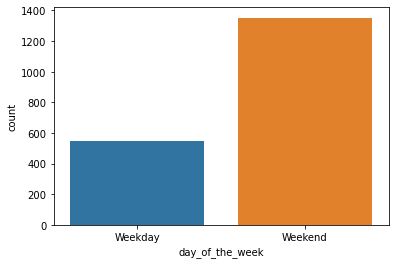

In [16]:
sns.countplot(df['day_of_the_week'])
#plt.savefig("weekday.jpg", bbox_inches='tight')

-The number orders placed on the weekend is more than double the number of orders placed on the weekdays.

-This makes sense because more people are home on the weekends and therefore are more likely to order out throughout the day 

-Conversely, during the week, people would be ordering food but possibly (although this would need to be explored further) primarily when they return home from work which means is a limited time window where orders are likely to be placed. 


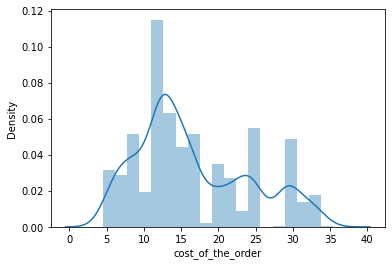

In [17]:
sns.distplot(df['cost_of_the_order'])
mean =  df['cost_of_the_order'].mean()
median =  df['cost_of_the_order'].median()
mode =  df['cost_of_the_order'].mode()


<AxesSubplot:xlabel='cost_of_the_order'>

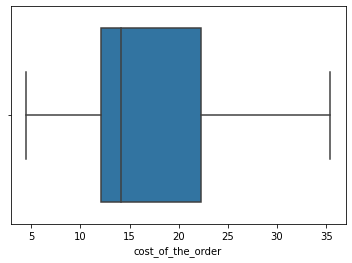

In [18]:
sns.boxplot(df['cost_of_the_order'])

-Although the cost of the orders range from \\$4.47 to \\$35.41, the vast majority of prices fall between \\$12 and \\$23 dollars. 

-This may indicate that although customers don't want to pay \\$ 30 for a meal, they also are willing to pay a bit more for the quality of the restaurants.

<AxesSubplot:xlabel='food_preparation_time', ylabel='Density'>

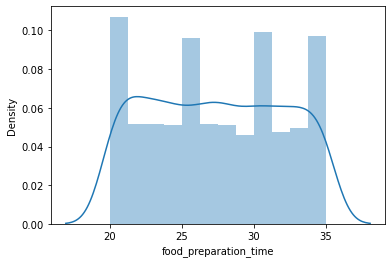

In [19]:
sns.distplot(df['food_preparation_time'])

<AxesSubplot:xlabel='food_preparation_time'>

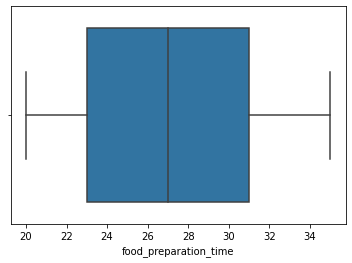

In [20]:
sns.boxplot(df['food_preparation_time'])

There is a relatively stable distribution of food preparation times as  the majority fall between 23 and 31 minutes with outliers that are not much different.  

<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

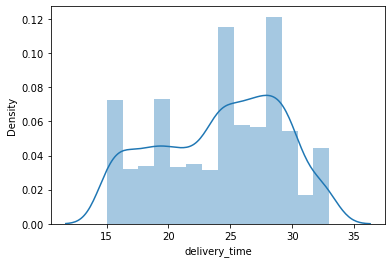

In [21]:
sns.distplot(df['delivery_time'])

<AxesSubplot:xlabel='delivery_time'>

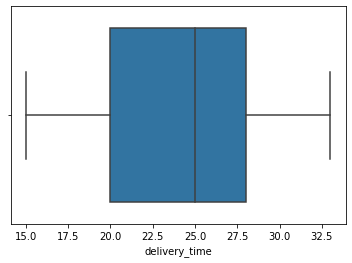

In [22]:
sns.boxplot(df['delivery_time'])

There is also a stable expectation delivery time as well for the most part meaning that customers are willing to wait 20-30 minutes for their orders but not much more than that. 

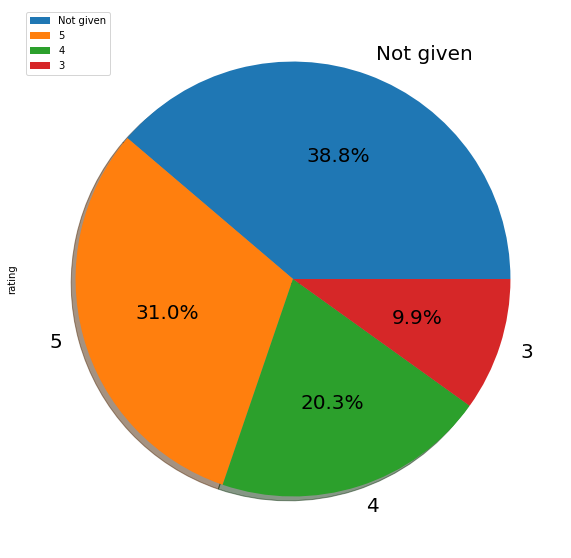

In [23]:
r = pd.DataFrame(df['rating'].value_counts())
r
r.plot.pie(y = 'rating', labels =r.index,autopct='%1.1f%%',shadow = True, figsize =(10,10), textprops={'fontsize':20})
plt.savefig("pie.jpg", bbox_inches='tight')

<AxesSubplot:xlabel='rating', ylabel='Density'>

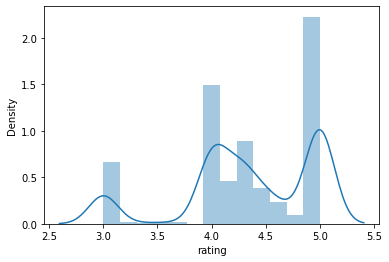

In [24]:
sns.distplot(df3['rating'])

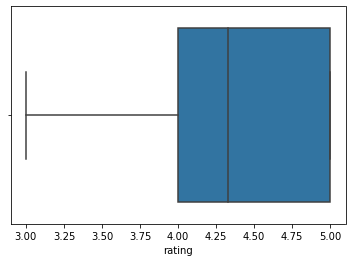

In [25]:
sns.boxplot(df3['rating'])
plt.savefig("rating.jpg", bbox_inches='tight')

-Nearly 40% of users did not provide a rating for the restaurants that they ordered from. 

-The result set is therefore an incomplete picture of how users feel about their orders.  

-When users do leave ratings, it's usually between 4-5 stars indicating that users who do leave ratings are more likely to report a positive experience with the restaurant and the app. 

### Question 7: Write the code to find the top 5 restaurants that have received the highest number of orders. (1 mark)

In [26]:
# write the code here
df['restaurant_name'].value_counts().head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
-The most popular restaurant to order from by far is Shake Shack followed distantly by The Meatball Shop and Blue Ribbon Sushi. 

-These three restaurants were the only ones that had gotten over a hundred orders.

### Question 8: Write the code to find the most popular cuisine on weekends. (1 mark)

In [27]:
# write the code here
df[df['day_of_the_week']=='Weekend']['cuisine_type'].value_counts().head(1)

American    415
Name: cuisine_type, dtype: int64

#### Observations:
The most popular cuisine on the weekends is American cuisine which makes sense because it is the most popular cuisine overall.

### Question 9: Write the code to find the number of total orders where the cost is above 20 dollars. What is the percentage of such orders in the dataset?  (1 mark)

In [28]:
# write the code here
df['Over 20 dollars'] = df['cost_of_the_order'].apply(lambda x: x>20)
df['Over 20 dollars'].value_counts(normalize = True).round(4)*100


False    70.76
True     29.24
Name: Over 20 dollars, dtype: float64

#### Observations:
~29.24% of orders are over \\$20

### Question 10: Write the code to find the mean delivery time based on this dataset. (1 mark)

In [29]:
# write the code here
df['delivery_time'].mean() 

24.161749209694417

#### Observations:
The average delivery time is approximately 24min.

### Question 11: Suppose the company has decided to give a free coupon of 15 dollars to the customer who has spent the maximum amount on a single order. Write the code to find the ID of the customer along with the order details. (1 mark)

In [31]:
df[df['cost_of_the_order'] == df['cost_of_the_order'].max()]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,cuisine_cat,Over 20 dollars
573,1477814,62359,Pylos,Mediterranean,35.41,Weekday,4,21,29,Misc,True


#### Observations:

    The customer who spent the most on a single order bought Mediterranean food on a weekday. This is interesting because the key aspects of the order (day of the week, type of the cuisine, and cost of the order) are all outliers to their respective categories. This particular order would not be an accurate representation of a typical order placed by a customer in this context

-The customer who spent the most on a single order bought Mediterranean food on a weekday. 

-This is interesting because the key aspects of the order (day of the week, type of the cuisine, and cost of the order) are all outliers to their respective categories. 

-This particular order would not be an accurate representation of a typical order placed by a customer in this context

### Multivariate Analysis

### Question 12: Perform bivariate/multivariate analysis to explore relationships between the important variables in the dataset. (7 marks)

<AxesSubplot:>

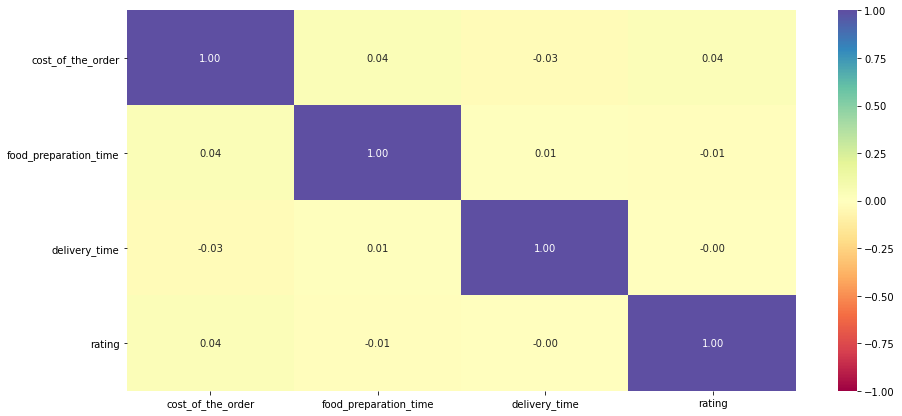

In [32]:
var = ['cost_of_the_order','food_preparation_time','delivery_time','rating']
corr= df3[var].corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr, annot=True, vmin =-1,vmax=1, fmt = ".2f", cmap="Spectral", xticklabels=corr.columns, yticklabels =corr.columns)

-This heatmap does not show any numeric variables with a high correlation indicating that none of these variables have a particularly high influence  over another. 

-This is especially notable with regards to rating as it appears that cost as well as time taken have no real influence over how customers feel about their experience (although, as mentioned previously, the ratings result set is incomplete so this observation may not be an accurate conclusion to draw just yet)

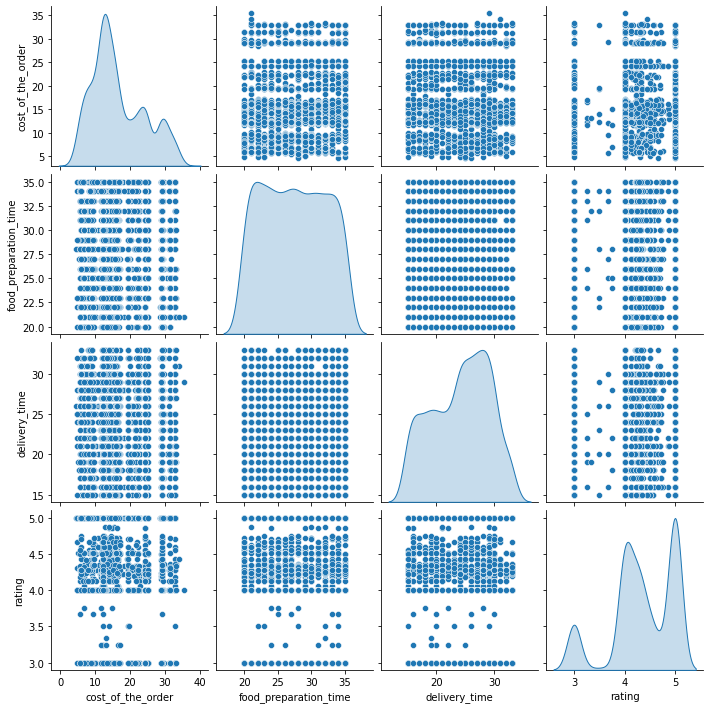

In [33]:
sns.pairplot(data=df3[var], diag_kind= 'kde')

In line with the results provided by the heat map, it does not appear that any of the numeric variables have a significant correlation with any of the others.

<AxesSubplot:xlabel='cuisine_type', ylabel='cost_of_the_order'>

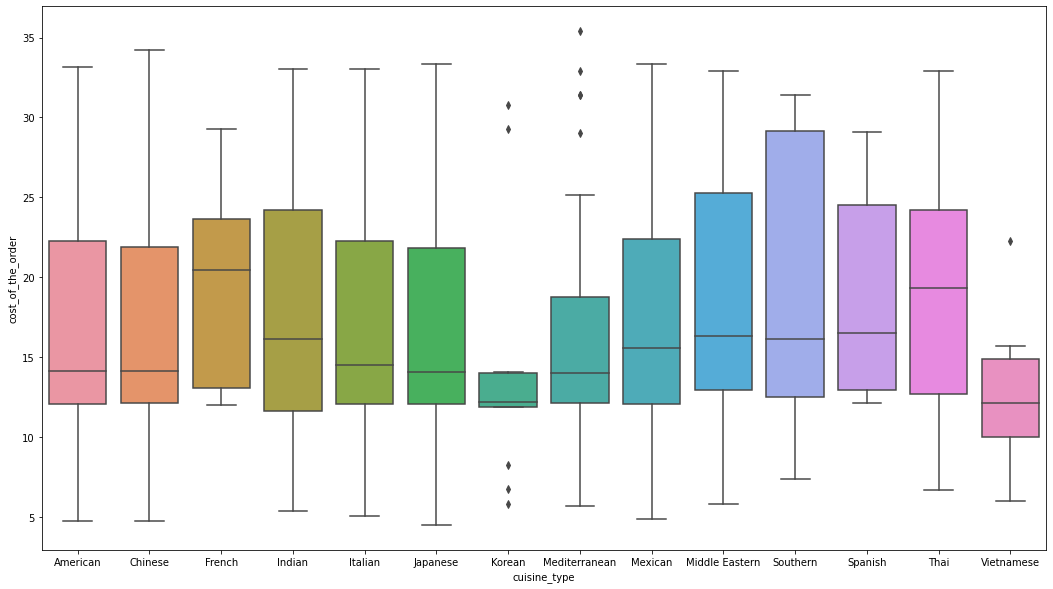

In [34]:
plt.figure(figsize =(18,10))
sns.boxplot(df['cuisine_type'],df['cost_of_the_order'])

-Southern cuisine appears to have the most varied distribution of order costs as the middle 50% of orders range from about \\$14 to almost \\$30.

-American and Japanese cuisine which have the highest and second highest number of orders also have a large range of costs but the majority fall between \\$17 and \\$22. 

-Over all none of the cuisines appear to be significant outliers in terms of cost. Korean and Vietnamese appear to have the lowest range of costs, but that could be because of the limited number of orders placed for those two categories.

Text(0, 0.5, 'Total Delivery Time')

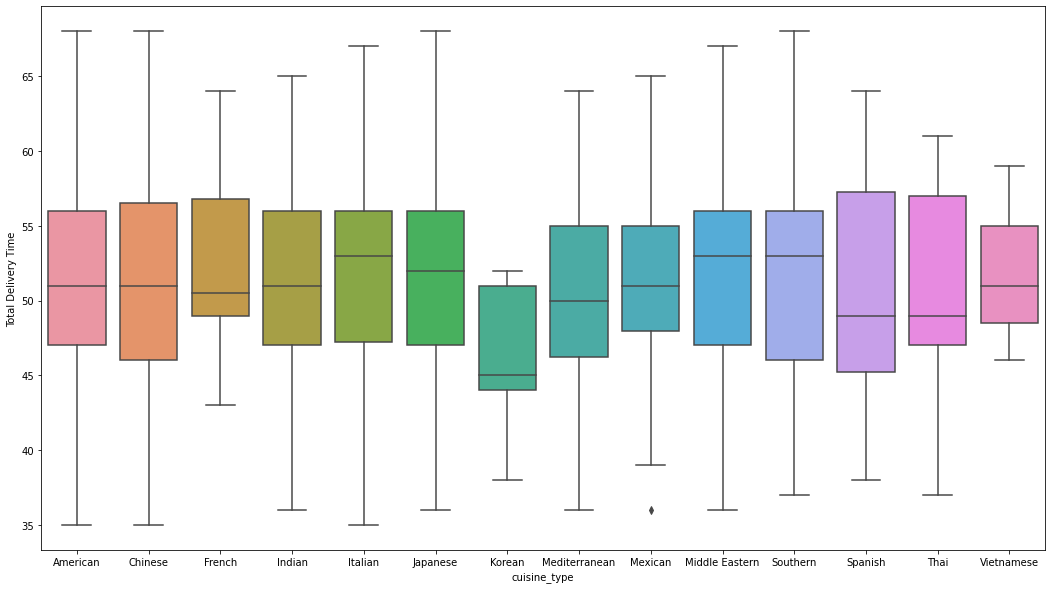

In [36]:
plt.figure(figsize =(18,10))
sns.boxplot(df['cuisine_type'],df['food_preparation_time']+ df['delivery_time'])
plt.ylabel('Total Delivery Time')
#plt.savefig("total_delivery.jpg", bbox_inches='tight')

Comparing the total delivery times of the various cuisines, although there are large ranges of preparation times across the board, it appears a typical order tends to stay between 45 and 55 minutes, so in a majority of cases, users would expect to recieve their food less an an hour after placing the order regardless of the type of food being prepared.

<AxesSubplot:xlabel='cuisine_cat', ylabel='count'>

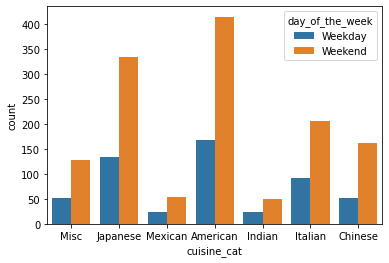

In [37]:
sns.countplot(df['cuisine_cat'], hue = df['day_of_the_week'])

In line with expectations, all types of cuisines are more popular on the weekends than the weekdays matching the overall trend.

<AxesSubplot:xlabel='cuisine_cat', ylabel='count'>

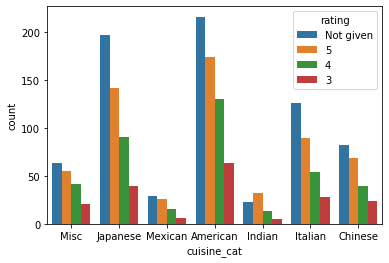

In [38]:
sns.countplot(df['cuisine_cat'], hue = df['rating'].sort_values(ascending = False))

In most cases, users are more likely to not leave a rating than to leave one, and users that leave ratings tend to leave positive ones.  Indian cuisine was the only type of cuisine with a significant number of orders where the number of orders with 5 star ratings exceeded the number of orders without a rating.

Text(0, 0.5, 'Average Rating')

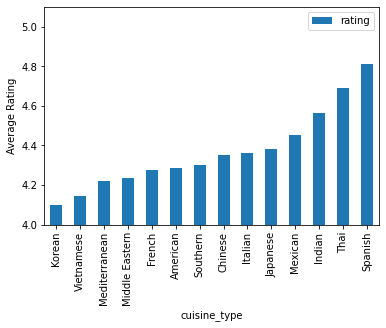

In [39]:
rat = pd.DataFrame(df3.groupby('cuisine_type')['rating'].mean().sort_values())
#rat =rat.reset_index()
r = rat.plot(kind = 'bar',ylim =(4,5))
#rate =sns.barplot(x = rat['cuisine_type'], y=rat['rating'], data=rat)
r.set(ylim =(4,5.1))
#rat.info()
r.set_ylabel("Average Rating")

Indian and Thai cuisines are the most highly rated of all cuisine types based on the average rating for each cuisine. 

Text(0, 0.5, 'Average Cost')

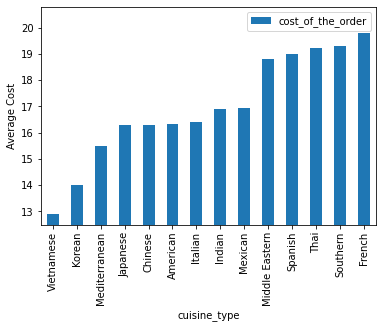

In [40]:
cos = pd.DataFrame(df3.groupby('cuisine_type')['cost_of_the_order'].mean().sort_values())
#rat =rat.reset_index()
c =cos.plot(kind = 'bar',ylim=(12.5))
#rate =sns.barplot(x = rat['cuisine_type'], y=rat['rating'], data=rat)
#rate.set(ylim =(4,5))
#rat.info()
#c.set_xlabel("x label")
c.set_ylabel("Average Cost")

The average cost of a meal tends to stay between 13 and 20 dollars, Korean and Vietnamese tend to be the cheapest whereas Southern, French, and Thai tend to be more expensive.

Text(0, 0.5, 'Average Rating')

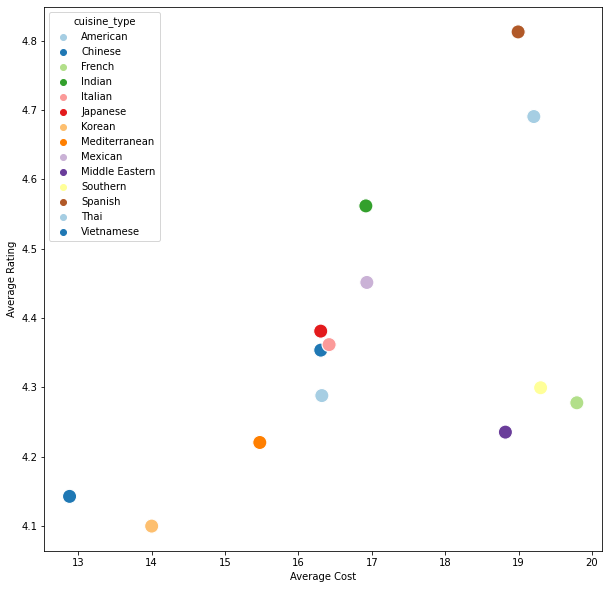

In [42]:
plt.figure(figsize =(10,10))
acr =cos.merge(rat,on = ['cuisine_type'], how='inner') 
sc = sns.scatterplot('cost_of_the_order','rating', data =acr, hue='cuisine_type',palette="Paired", s=200, )
sc.set_xlabel("Average Cost")
sc.set_ylabel("Average Rating")
#plt.savefig("scatter.jpg", bbox_inches='tight')

-There appears to be a trend where as the average cost of the order increases so does the average rating. 

-This does not necessarily imply that there is any causal relationship between the two variables particularly when taking into consideration the different types of cuisines themselves.

-It may be worth looking into onboarding more expensive restaurants from more lower rated cuisine types to provide more variety to users and see how that impacts trends.

### Question 13: Suppose the company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Write the code to find the restaurants fulfilling the criteria to get the promotional offer. (2 marks)

In [44]:
# write the code here

#Creating a result set for restaurants with more than 50 ratings
ov =df3.groupby('restaurant_name')['rating'].count()>50
o = ov[ov].index.to_list()
fc =df3.loc[(df3.restaurant_name.isin(o) == True)]

#Creating a result set for restaurants that have a rating greater than 4 stars.
av = df3.groupby('restaurant_name')['rating'].mean()>4
l = av[av].index.to_list()
v = df3.loc[df3.restaurant_name.isin(l)]

#Merging the two dataframes together
big =v.merge(fc, on = ['order_id','restaurant_name','customer_id', 'cuisine_type', 'cost_of_the_order', 'day_of_the_week','rating','food_preparation_time','delivery_time'] , how = 'inner')

#Creating a consolidated view of the qualifying restaurants and their average rating
aver= pd.DataFrame(big.groupby('restaurant_name')['rating'].mean().sort_index(ascending = False))#.head(30)
aver = aver.rename({'rating': 'Average Rating'}, axis =1)

#Creating a consolidated view of the qualifying restaurants and their order count
over = pd.DataFrame(big['restaurant_name'].value_counts(), index = big['restaurant_name'])#.groupby('restaurant_name').count().sort_index(ascending= False))
over = over.rename({'restaurant_name': 'order count'}, axis =1)#[['orderids']]


#Merging the two consolidated views together to get an overall picture
final = aver.merge(over, on = 'restaurant_name').sort_index().drop_duplicates().round(2)
final.sort_index()


#Creating a consolidated view with more features 
#Includes the average cost, average food preparation time, and average delivery time 
#Provides an idea of what characteristics more successful restaurants tend to have

base = big[['restaurant_name', 'cuisine_type']].merge(final, on = 'restaurant_name', how = 'inner').drop_duplicates().reset_index().drop('index', axis =1)
big.set_index('restaurant_name')
cost= big.groupby('restaurant_name')['cost_of_the_order'].mean().dropna()
food = big.groupby('restaurant_name')['food_preparation_time'].mean().dropna()
deliver = big.groupby('restaurant_name')['delivery_time'].mean().dropna()
base = base.merge(food, on = 'restaurant_name', how = 'inner')
base = base.merge(cost, on = 'restaurant_name', how = 'inner')
base = base.merge(deliver, on = 'restaurant_name', how = 'inner')
base.rename(columns ={'food_preparation_time' : 'Avg Food Prep Time', 'cost_of_the_order': 'Avg Cost of the Order', 'delivery_time': 'Avg Delivery Time'})
#base.to_csv('top_restaurants.csv')
base

,restaurant_name,cuisine_type,Average Rating,order count,food_preparation_time,cost_of_the_order,delivery_time
0,Blue Ribbon Fried Chicken,American,4.33,96,27.197917,17.315521,24.145833
1,The Meatball Shop,Italian,4.51,132,27.181818,16.251591,24.242424
2,The Meatball Shop,American,4.51,132,27.181818,16.251591,24.242424
3,Shake Shack,American,4.28,219,27.945205,16.344886,24.662100
4,RedFarm Hudson,Chinese,4.18,55,27.163636,16.749273,24.200000
5,Blue Ribbon Sushi,Japanese,4.22,119,27.924370,15.999580,23.941176
6,Parm,Italian,4.13,68,27.308824,16.364118,25.500000
7,RedFarm Broadway,Chinese,4.24,59,27.593220,16.358136,23.152542


#### Observations:


-There are 7 restaurants which qualify for the promotion. 

-The majority of the are American.

-It appears that The Meatball Shop has been classified separately as both Italian and American within the dataset hence it appears twice on the list.

-This consolidated view provides an idea of what characteristcs successful restaurants tend to have within FoodHub. 

-Interestingly all 7 restaurants use an average of about 27 minutes of food preparation time and approximately 24 minutes of delivery time and have an average cost of about 16 dollars. This is useful because it provides a consistent standard that can be used to compare other restaurants.  

### Question 14: Suppose the company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Write the code to find the net revenue generated on all the orders given in the dataset. (2 marks)

In [45]:
# write the code here
def netCharge(x):
    if x>20:
        ret = x*1.25
    elif x>5:
        ret = x*1.15
    else:
        ret = 0
    
    if ret == 0:
        nr = 0
    else:
        nr= ret -x
    
    return nr



df['Net Revenue'] = df['cost_of_the_order'].apply(netCharge)

df.head()
        


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,cuisine_cat,Over 20 dollars,Net Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,Misc,True,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,Japanese,False,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,Mexican,False,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,American,True,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,American,False,1.7385


In [46]:
df['Net Revenue'].describe()

count    1898.000000
mean        3.248842
std         2.295598
min         0.000000
25%         1.812000
50%         2.121000
75%         5.574375
max         8.852500
Name: Net Revenue, dtype: float64

In [47]:
df['Net Revenue'].sum()

6166.302999999998

#### Observations:


-The median net revenue is \\$2.12 and the mean is larger than the median which indicates a right skew for this particular feature. 

-This makes sense because the maximum revenue generated would be around \\$8.85 which considerably more than the average revenue. 

-This would certainly generate a bit of income for the company, but considering have the revenues per order are close to under \\$2.00, it might be worth increasing the charges, particularly on the more expensive restaurants or much more popular restaurants such as Shake Shack to capitalize on the demand.

### Question 15: Suppose the company wants to analyze the total time required to deliver the food. Write the code to find out the percentage of orders that have more than 60 minutes of total delivery time. (2 marks)

Note: The total delivery time is the summation of the food preparation time and delivery time. 

In [48]:
# write the code here
df['Total Delivery Time']  = df['food_preparation_time'] +df['delivery_time']

In [49]:
df['Over Hour Limit'] = df['Total Delivery Time']>60 #.apply(lambda x: x>60)

In [50]:
df['Over Hour Limit'].value_counts(normalize = True)

False    0.894626
True     0.105374
Name: Over Hour Limit, dtype: float64

#### Observations:


Approximately 10.5% of all orders take longer than 60 minutes to complete which is inline with the previous analysis having indicated that the majority of orders tend to take between 45 and 55 minutes

### Question 16: Suppose the company wants to analyze the delivery time of the orders on weekdays and weekends. Write the code to find the mean delivery time on weekdays and weekends. Write your observations on the results. (2 marks)

In [51]:
# write the code here
df.groupby('day_of_the_week')['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations:


-The mean delivery time is 28 minutes for a weekday and 22 minutes for the weekend. 

-This may be because there are more drivers available on the weekends to deliver food. 

-However, if the business wants to increase the demand on the weekend, they may want to consider employing more drivers on the weekdays to reduce delivery times and possibly increasing demand

### Conclusion and Recommendations

### **Question 17:** Write the conclusions and business recommendations derived from the analysis. (3 marks)

#### Key Insights:

We examined a set of 1898 food delivery orders placed on the foodhub app. The main characteristics analyzed were the restaurant, cuisine type, rating, food preparation time, delivery time, order cost. The primary variable of interest was the number of orders placed within app and determining what factors played a role in determining what restaurants were successful as well as what additional insights would be needed in order to provide a deeper insight into how to maximize demand for FoodHub Food delivery.


#### Observations:
1. The most popular type of cuisine by far is American which makes sense given that the service is based in NYC. This is followed closely by Japanese cuisine.

2. The number of orders placed on the weekend are double the number of orders placed on the weekdays.

3. Contrary to what might be expected, food preparation time, delivery time and order cost do not appear to have a significant impact on one another.

4. 40% of all order placed had no rating which means that it is difficult to gauge how favorably restaurants are actually being received. The majority of the reviews that were left are positive (4+ stars)

5. The most popular and highest rated cuisine have very similar stats in terms of  average time spent (27 min prep time, 24 min delivery time) and average cost (16 dollars) regardless of type of cuisine being prepared. This could potentially provide a useful metric for other restaurants to strive for (especially less popular ones).

6. The mean delivery time for weekends is 6 min more than weekdays.

#### Recommendations to Business:

1. Provide a discount on the weekdays for the most popular restaurants to increase demand since demand during the work week is significantly less than the weekend. Conversely, charge a premium for those restaurants on the weekend since the demand is high.

2. Provide incentives for users to leave ratings in the app for their orders such as a points rewards system in order to encourage more feedback and provide a more complete dataset for analysis

3. Run promotions for less popular restaurants particularly those with high ratings in order to increase demand.

4. Get more details on where exactly the demand is on the weekdays vs the weekend (such as on a daily basis) or tracking demand across a time period like 6 months to a year to get a better idea of if there are other time based trends worth capitalizing on. 

5. Gather data on distance of restaurants to the respective customers home and raise the prices based on distance as well to generate another source of revenue. 










#### Further Analysis
1. Gather more detail on the time-based data related to orders such as daily hourly or weekly information in order to gauge which specific days and times of days produce the most order

2. Gather location based data to see what impact location has on how many orders are placed at a particular restaurant.